In [ ]:
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras import datasets
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization
import pandas as pd
import numpy as np
import os
import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
num_classes = 5
image_size = 224

In [ ]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input,)

In [ ]:
trainDir = '/content/drive/MyDrive/dataset4/train'
train_set = data_generator.flow_from_directory(
    trainDir,
    target_size=(image_size, image_size),
    batch_size=5000,
    class_mode='categorical'
    )

Found 19050 images belonging to 5 classes.


In [ ]:
x_train, y_train = next(train_set)
len(x_train)

5000

In [ ]:
testDir = '/content/drive/MyDrive/dataset4/test'
test_set = data_generator.flow_from_directory(
    testDir,
    target_size=(image_size, image_size),
    batch_size=600,
    class_mode='categorical'
    )

Found 1574 images belonging to 5 classes.


In [ ]:
x_test, y_test = next(test_set)
len(x_test)

600

In [ ]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (5000, 224, 224, 3)
y_train (5000, 5)
x_test (600, 224, 224, 3)
y_test (600, 5)


In [ ]:
# importa o modelo ResNet50 e descarta a última camada do classifier.
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(image_size, image_size, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
last_layer = base_model.get_layer('conv5_block3_out')
print(last_layer.output_shape)

(None, 7, 7, 2048)


In [ ]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [ ]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) 

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
model.compile(loss='categorical_crossentropy',
            optimizer = Adam(lr=0.001),
            metrics=['accuracy'])
hist=model.fit(x_train, y_train, batch_size=120,steps_per_epoch = 3, epochs=20, validation_split=0.3)

Epoch 1/20
3/3 [==============================] - 340s 156s/step - loss: 192.8129 - accuracy: 0.2444 - val_loss: 156.4615 - val_accuracy: 0.2553
Epoch 2/20
3/3 [==============================] - 334s 155s/step - loss: 110.4363 - accuracy: 0.3306 - val_loss: 69.1044 - val_accuracy: 0.3107
Epoch 3/20
3/3 [==============================] - 333s 156s/step - loss: 57.8902 - accuracy: 0.4417 - val_loss: 51.5195 - val_accuracy: 0.5093
Epoch 4/20
3/3 [==============================] - 332s 155s/step - loss: 38.5951 - accuracy: 0.5972 - val_loss: 23.2988 - val_accuracy: 0.6300
Epoch 5/20
3/3 [==============================] - 332s 155s/step - loss: 29.9751 - accuracy: 0.5750 - val_loss: 19.2527 - val_accuracy: 0.6233
Epoch 6/20
3/3 [==============================] - 331s 155s/step - loss: 23.7552 - accuracy: 0.6250 - val_loss: 13.8096 - val_accuracy: 0.7000
Epoch 7/20
3/3 [==============================] - 330s 154s/step - loss: 14.1762 - accuracy: 0.7194 - val_loss: 13.7723 - val_accuracy: 0.6

In [ ]:
res = model.evaluate(x_train, y_train)
print(f'정확도={res[1]*100:.1f}%')

157/157 [==============================] - 895s 6s/step - loss: 0.3940 - accuracy: 0.8748
정확도=87.5%


In [ ]:
res = model.evaluate(x_test, y_test)
print(f'정확도={res[1]*100:.1f}%')

19/19 [==============================] - 109s 6s/step - loss: 0.6630 - accuracy: 0.7967
정확도=79.7%


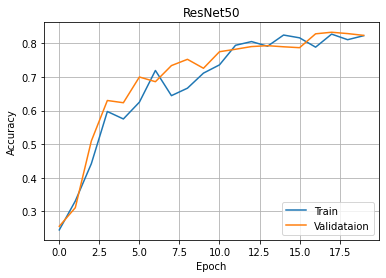

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

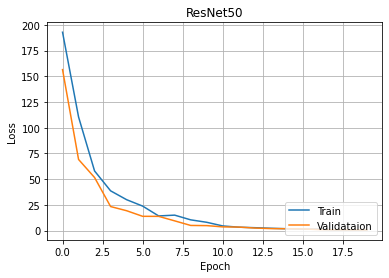

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('ResNet50')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
from tensorflow.python.keras.models import load_model
model.save('RN50_model.h5')